In [61]:
import time, sys, joblib

import pandas as pd

sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

In [62]:
##%%
def filter_pval_dict(pval_dict, target_dict, threshold=0.05):
    target_dict_df = pd.DataFrame(target_dict)
    filtered_dict = {}
    for par in pval_dict.keys():
        filtered_dict[par] = {}
        par_dict = pval_dict[par]
        target_df_par = target_dict_df[target_dict_df['parameter'] == par]
        
        for method in par_dict.keys():
            targets_p_m = (target_df_par[target_df_par['method'] == method])['target']
            selected_targets = (np.abs(targets_p_m) < threshold)
            pvals_p_m = np.array(pval_dict[par][method])
            filtered_dict[par][method] = pvals_p_m[selected_targets].tolist()
    
    return filtered_dict

def calculate_thresholded_power(pivot, targets, level, threshold=0.05):
    pivot = np.array(pivot)
    targets = np.array(targets)
    non_null = (np.abs(targets) >= threshold)
    rejection = 2 * np.min([pivot, 1 - pivot], axis=0) < level
    true_rej = np.sum(non_null * rejection) / np.sum(non_null)

    return true_rej

# Vary Main with Weak Hierarchy

In [121]:
dir_list_wh1_5 = ['results0_40_wh1.5.pkl', 'results40_80_wh1.5.pkl',
               'results80_120_wh1.5.pkl', 'results120_160_wh1.5.pkl',
               'results160_200_wh1.5.pkl', 'results200_240_wh1.5.pkl',
               'results240_280_wh1.5.pkl', 'results280_320_wh1.5.pkl'
               ]
"""dir_list_wh1 = ['results0_20_wh1.0.pkl', 'results20_40_wh1.0.pkl',
               'results40_60_wh1.0.pkl', 'results60_80_wh1.0.pkl',
               'results80_100_wh1.0.pkl', 'results100_120_wh1.0.pkl',
               'results120_140_wh1.0.pkl', 'results140_160_wh1.0.pkl'
               ]
dir_list_wh2_5 = ['results0_20_wh2.5.pkl', 'results20_40_wh2.5.pkl',
               'results40_60_wh2.5.pkl', 'results60_80_wh2.5.pkl',
               'results80_100_wh2.5.pkl', 'results100_120_wh2.5.pkl',
               'results120_140_wh2.5.pkl', 'results140_160_wh2.5.pkl'
               ]"""
#dir_list_wh = ['results0_40_wh.pkl']
#dir_list_wh = ['results0_20_wh1.5.pkl']

"dir_list_wh1 = ['results0_20_wh1.0.pkl', 'results20_40_wh1.0.pkl',\n               'results40_60_wh1.0.pkl', 'results60_80_wh1.0.pkl',\n               'results80_100_wh1.0.pkl', 'results100_120_wh1.0.pkl',\n               'results120_140_wh1.0.pkl', 'results140_160_wh1.0.pkl'\n               ]\ndir_list_wh2_5 = ['results0_20_wh2.5.pkl', 'results20_40_wh2.5.pkl',\n               'results40_60_wh2.5.pkl', 'results60_80_wh2.5.pkl',\n               'results80_100_wh2.5.pkl', 'results100_120_wh2.5.pkl',\n               'results120_140_wh2.5.pkl', 'results140_160_wh2.5.pkl'\n               ]"

In [122]:
opers = []
pvals = []
targets = []
for path in dir_list_wh1_5:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [123]:
oper_char = combine_lists(opers)

In [124]:
pd.DataFrame(oper_char)

,coverage rate,avg length,method,rho,signal,main signal,power
0,0.833333,1.252938,Naive,0.5,0.05,2,0.166667
1,0.973214,2.175432,Data Splitting,0.5,0.05,2,0.026786
2,0.981481,1.492791,MLE,0.5,0.05,2,0.018519
3,1.000000,1.311144,Naive,0.5,0.05,1,0.000000
4,0.949495,2.104482,Data Splitting,0.5,0.05,1,0.050505
...,...,...,...,...,...,...,...
1915,0.969697,2.194434,Data Splitting,0.5,0.05,2,0.030303
1916,0.949495,1.817279,MLE,0.5,0.05,2,0.050505
1917,0.981481,1.285131,Naive,0.5,0.05,1,0.018519
1918,0.847059,1.780492,Data Splitting,0.5,0.05,1,0.152941


In [95]:
pvals_all = combine_nested_lists(pvals)

In [96]:
targets_all = combine_lists(targets)

In [97]:
pvals_all

{2: {'Naive': [0.15432809255824004,
   0.14884535437311974,
   0.1648557658925212,
   0.14701614423861248,
   0.08397027013797137,
   0.14030814208747122,
   0.05367825967631382,
   0.13701126418758908,
   0.20174248234643344,
   0.29559777536714416,
   0.1305442080738941,
   0.06086062187740386,
   0.07757924203430802,
   0.31019745517850106,
   0.017980585119338834,
   0.1240330570583954,
   0.050929090290499586,
   0.061115349895491236,
   0.41263293990590366,
   0.7812563587432724,
   0.3098175123307651,
   0.17899533612271656,
   0.12465128105556,
   0.28712320299488336,
   0.029261533279891484,
   0.13338136852325289,
   0.3079162785356569,
   0.41403430920948003,
   0.26202308569492716,
   0.13779806914266662,
   0.18456781694805463,
   0.24793120217401282,
   0.06603582229862338,
   0.1329671001865863,
   0.1536631178732339,
   0.07670970974503351,
   0.46740670972540044,
   0.10564028821190735,
   0.05775548951554006,
   0.03642582332594737,
   0.11797543564537116,
   0.033904

In [98]:
pd.DataFrame(targets_all)

,parameter,target,target id,method,index,pivot
0,2,1.528656,"(0, 1)",Naive,0,0.154328
1,2,0.601398,"(0, 2)",Naive,0,0.148845
2,2,1.418276,"(0, 3)",Naive,0,0.164856
3,2,1.859440,"(0, 4)",Naive,0,0.147016
4,2,1.942472,"(0, 5)",Naive,0,0.083970
...,...,...,...,...,...,...
68462,1,0.420857,"(14, 19)",MLE,155,0.763923
68463,1,0.305341,"(15, 19)",MLE,155,0.047894
68464,1,0.359611,"(16, 19)",MLE,155,0.550838
68465,1,0.153535,"(17, 19)",MLE,155,0.871847


# Calculating Thresholded Power

In [99]:
grouped_targets = pd.DataFrame(targets_all).groupby(['index', 'method', 'parameter'])

In [115]:
power_df = {}
power_df['parameter'] = []
power_df['method'] = []
power_df['thresholded power'] = []
for name, group in grouped_targets:
    power_df['parameter'].append(name[2])
    power_df['method'].append(name[1])
    pivots = group['pivot']
    targets = group['target']
    power_df['thresholded power'].append(calculate_thresholded_power(pivots, targets,
                                                                     level=0.1, 
                                                                     threshold=0.1))
    

In [101]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 0.1)

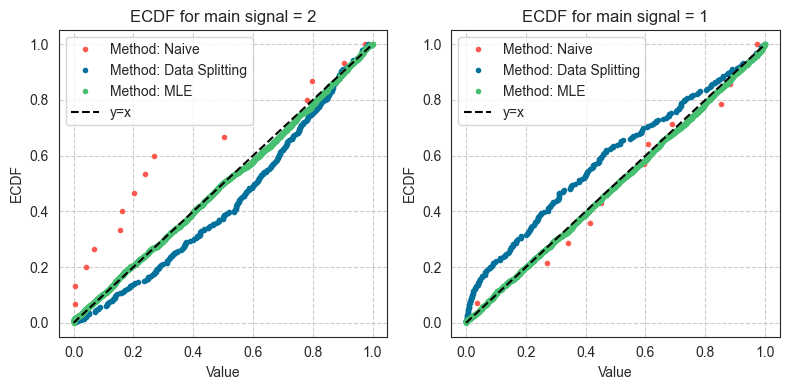

In [102]:
plot_ecdfs(filtered_dict, xaxis="main signal")

In [103]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 10)

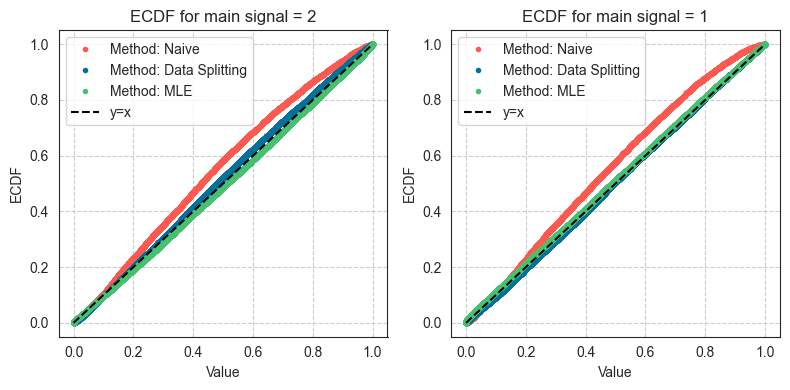

In [104]:
plot_ecdfs(filtered_dict, xaxis="main signal")

In [105]:
pd.DataFrame(targets_all)

,parameter,target,target id,method,index,pivot
0,2,1.528656,"(0, 1)",Naive,0,0.154328
1,2,0.601398,"(0, 2)",Naive,0,0.148845
2,2,1.418276,"(0, 3)",Naive,0,0.164856
3,2,1.859440,"(0, 4)",Naive,0,0.147016
4,2,1.942472,"(0, 5)",Naive,0,0.083970
...,...,...,...,...,...,...
68462,1,0.420857,"(14, 19)",MLE,155,0.763923
68463,1,0.305341,"(15, 19)",MLE,155,0.047894
68464,1,0.359611,"(16, 19)",MLE,155,0.550838
68465,1,0.153535,"(17, 19)",MLE,155,0.871847


In [106]:
# List and array representations of true interaction indices
active_inter_list_true = np.array([[0, 1], [1, 2], [2, 4], [1, 5], [2, 6]])
active_inter_list_true_list = [(x[0], x[1]) for x in active_inter_list_true]

In [107]:
import ast
def filter_targets(targets_dict, true_inter_list):
    targets = targets_dict['target id']
    true_flag = [ast.literal_eval(t) in true_inter_list for t in targets]
    filtered_dict = {}
    for k in targets_dict.keys():
        filtered_dict[k] = np.array(targets_dict[k])[true_flag].tolist()
        
    return filtered_dict
        

In [108]:
filtered_targets = filter_targets(targets_all, active_inter_list_true_list)

In [109]:
##%%
def filter_targets_dict(target_dict, method='Naive'):
    filtered_dict = {}
    for par in target_dict.keys():
        filtered_dict[par] = (np.array(target_dict[par])[np.array(target_dict['method']) == method]).tolist()
    
    return filtered_dict

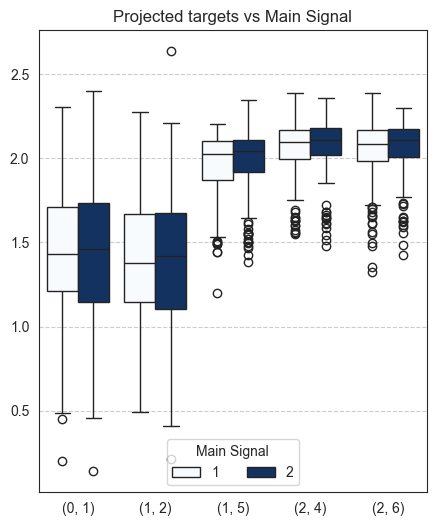

In [110]:
plot_multi_targets(filter_targets_dict(filtered_targets,'Naive'), xaxis="Main Signal")

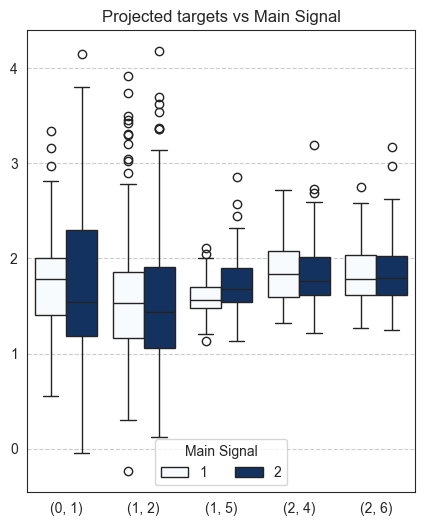

In [111]:
plot_multi_targets(filter_targets_dict(filtered_targets,'Data Splitting'), xaxis="Main Signal")

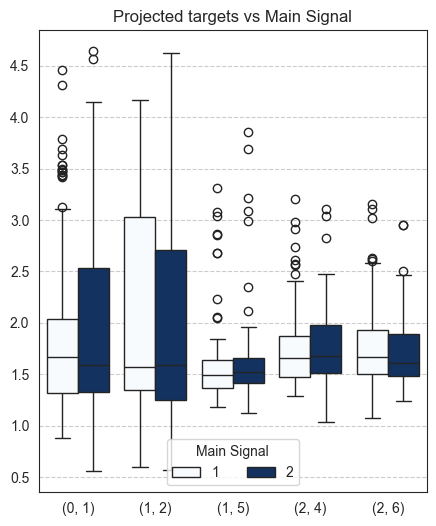

In [112]:
plot_multi_targets(filter_targets_dict(filtered_targets,'MLE'), xaxis="Main Signal")

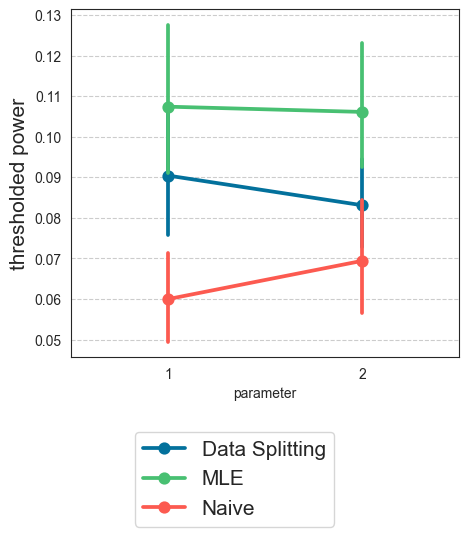

In [116]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(power_df),
                        x_axis="parameter",
                        hue="method",
                        metric_list=["thresholded power"])

In [60]:
targets_df = pd.DataFrame(targets_all)

In [48]:
targets_df

,parameter,target,target id,method
0,10,1.548096,"(0, 1)",Naive
1,10,0.828848,"(0, 2)",Naive
2,10,1.479679,"(0, 3)",Naive
3,10,1.888243,"(0, 4)",Naive
4,10,1.958373,"(0, 5)",Naive
...,...,...,...,...
335674,1,-0.449803,"(14, 19)",MLE
335675,1,0.181771,"(15, 19)",MLE
335676,1,0.209295,"(16, 19)",MLE
335677,1,0.265221,"(17, 19)",MLE


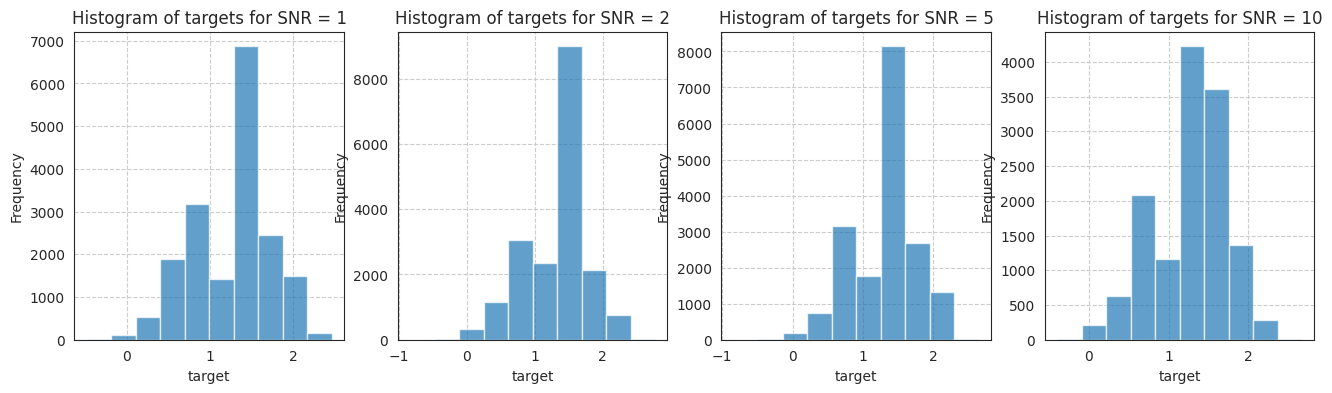

In [49]:
targets_df_naive = targets_df[targets_df['method']=='Naive']
# Grouping by 'y' and plotting histograms
grouped_targets = targets_df_naive.groupby('parameter')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
i = 0
for name, group in grouped_targets:
    axs[i].hist(group['target'], bins=10, alpha=0.7)
    axs[i].set_xlabel('target')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of targets for SNR = {name}')
    i += 1